# Title Generation using Deep Learning GPT Model

This project aims to generate course titles based on a given set of skills using the GPT-2 model. We'll be using the Coursera course dataset available at [Kaggle](https://www.kaggle.com/datasets/azraimohamad/coursera-course-data/data).

#### Course: ***Deep Learning, University of Haifa***

#### Supervision: ***Prof. Margarita Osadchy***

#### Due Date: ***21/4/2024***


## Submitters:
**Name:** Faisal Omari
**ID:** 325616894 

**Name:** Saji Assi
**ID:** 314831207

### Technologies Used:
- Python
- Transformers library (Hugging Face)
- Pandas
- Matplotlib
- Jupyter Notebook


In [1]:
# Imports and Mode Selection

import pandas as pd
import matplotlib.pyplot as plt
from transformers import GPT2Tokenizer, GPT2LMHeadModel, TextDataset, DataCollatorForLanguageModeling, Trainer, TrainingArguments
import numpy as np

2024-04-19 14:20:31.365877: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Preprocessing Data

In this section, we preprocess the dataset by combining skills and titles and saving the data to a text file for training.


In [2]:
# Load the dataset
df = pd.read_csv('coursera_course_dataset_v2_no_null.csv')

# Preprocessing the data
df['input_text'] = df['Skills'].apply(lambda x: 'Course skills: ' + x)
df['target_text'] = df['Title'].apply(lambda x: 'Course title: ' + x)

# Save the preprocessed data to a new file
training_data = df[['input_text', 'target_text']].values.tolist()
with open('training_data.txt', 'w') as file:
    for input_text, target_text in training_data:
        file.write(input_text + ' \\n ' + target_text + '\n')

## Initializing Tokenizer and Model

Here, we initialize the GPT-2 tokenizer and model for fine-tuning.


In [3]:
# Tokenizer and Model Initialization
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

## Training Dataset Preparation

In this section, we prepare the training dataset using the preprocessed data and define data collators.


In [4]:
# Training Dataset
train_path = 'training_data.txt'
train_dataset = TextDataset(
    tokenizer=tokenizer,
    file_path=train_path,
    block_size=128
)

# Data Collator
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=False
)

/home/faisal/anaconda3/lib/python3.10/site-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


## Training Arguments Setup

Here, we define the training arguments such as output directory, batch size, and logging settings.


In [5]:
# Training Arguments
training_args = TrainingArguments(
    output_dir="./gpt2-finetuned",
    overwrite_output_dir=True,
    num_train_epochs=70,
    per_device_train_batch_size=4,
    save_steps=10_000,
    save_total_limit=2,
    logging_dir="./logs",
    logging_steps=100,
    disable_tqdm=False,
)

## Trainer Initialization

In this section, we initialize the Trainer object with the model, training arguments, and dataset.


In [6]:
# Trainer Initialization
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
)

/home/faisal/anaconda3/lib/python3.10/site-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


## Start Fine-Tuning

Now, we start fine-tuning the GPT-2 model on the training dataset.


In [7]:
# Start fine-tuning
trainer.train()

  0%|          | 0/4760 [00:00<?, ?it/s]

{'loss': 2.0133, 'grad_norm': 8.969599723815918, 'learning_rate': 4.8949579831932775e-05, 'epoch': 1.47}
{'loss': 1.5174, 'grad_norm': 7.2259039878845215, 'learning_rate': 4.7899159663865554e-05, 'epoch': 2.94}
{'loss': 1.3497, 'grad_norm': 8.348797798156738, 'learning_rate': 4.684873949579832e-05, 'epoch': 4.41}
{'loss': 1.2562, 'grad_norm': 7.4275288581848145, 'learning_rate': 4.579831932773109e-05, 'epoch': 5.88}
{'loss': 1.166, 'grad_norm': 9.509952545166016, 'learning_rate': 4.474789915966387e-05, 'epoch': 7.35}
{'loss': 1.0886, 'grad_norm': 8.298806190490723, 'learning_rate': 4.369747899159664e-05, 'epoch': 8.82}
{'loss': 1.0096, 'grad_norm': 8.219958305358887, 'learning_rate': 4.2647058823529415e-05, 'epoch': 10.29}
{'loss': 0.9418, 'grad_norm': 8.349778175354004, 'learning_rate': 4.159663865546219e-05, 'epoch': 11.76}
{'loss': 0.8713, 'grad_norm': 6.423616886138916, 'learning_rate': 4.054621848739496e-05, 'epoch': 13.24}
{'loss': 0.8177, 'grad_norm': 7.23958683013916, 'learning

TrainOutput(global_step=4760, training_loss=0.46443771173974047, metrics={'train_runtime': 1230.9214, 'train_samples_per_second': 15.354, 'train_steps_per_second': 3.867, 'train_loss': 0.46443771173974047, 'epoch': 70.0})

## Save Model and Tokenizer

After fine-tuning, we save the fine-tuned model and tokenizer for future use.


In [8]:
# Save the fine-tuned model and tokenizer
model.save_pretrained("./gpt2-finetuned")
tokenizer.save_pretrained("./gpt2-finetuned")

('./gpt2-finetuned/tokenizer_config.json',
 './gpt2-finetuned/special_tokens_map.json',
 './gpt2-finetuned/vocab.json',
 './gpt2-finetuned/merges.txt',
 './gpt2-finetuned/added_tokens.json')

## Plot Training Loss

Here, we plot the training loss to visualize the training progress.


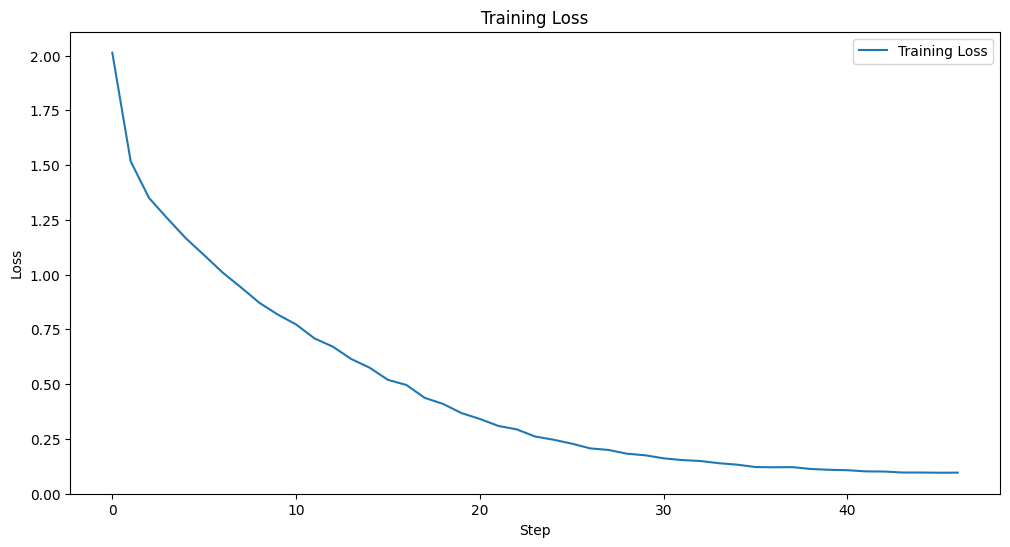

In [9]:
# Plot the training loss
train_metrics = trainer.state.log_history
train_loss = [metric['loss'] for metric in train_metrics if 'loss' in metric]

plt.figure(figsize=(12, 6))
plt.plot(range(len(train_loss)), train_loss, label="Training Loss")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()
plt.savefig("training_loss_plot.png")
plt.show()

## Data Analysis and Visualization

In this section, we perform data analysis and visualization on the Coursera course dataset.


   Unnamed: 0                                  Title Organization  \
0           0                   Google Cybersecurity       Google   
1           1                  Google Data Analytics       Google   
2           2             Google Project Management:       Google   
3           3                       IBM Data Science          IBM   
4           4  Google Digital Marketing & E-commerce       Google   

                                              Skills  Ratings  \
0   Network Security, Python Programming, Linux, ...      4.8   
1   Data Analysis, R Programming, SQL, Business C...      4.8   
2   Project Management, Strategy and Operations, ...      4.8   
3   Python Programming, Data Science, Machine Lea...      4.6   
4   Digital Marketing, Marketing, Marketing Manag...      4.8   

       Review counts                                           Metadata  \
0   4.8(20K reviews)  Beginner · Professional Certificate · 3 - 6 Mo...   
1  4.8(137K reviews)  Beginner · Professiona

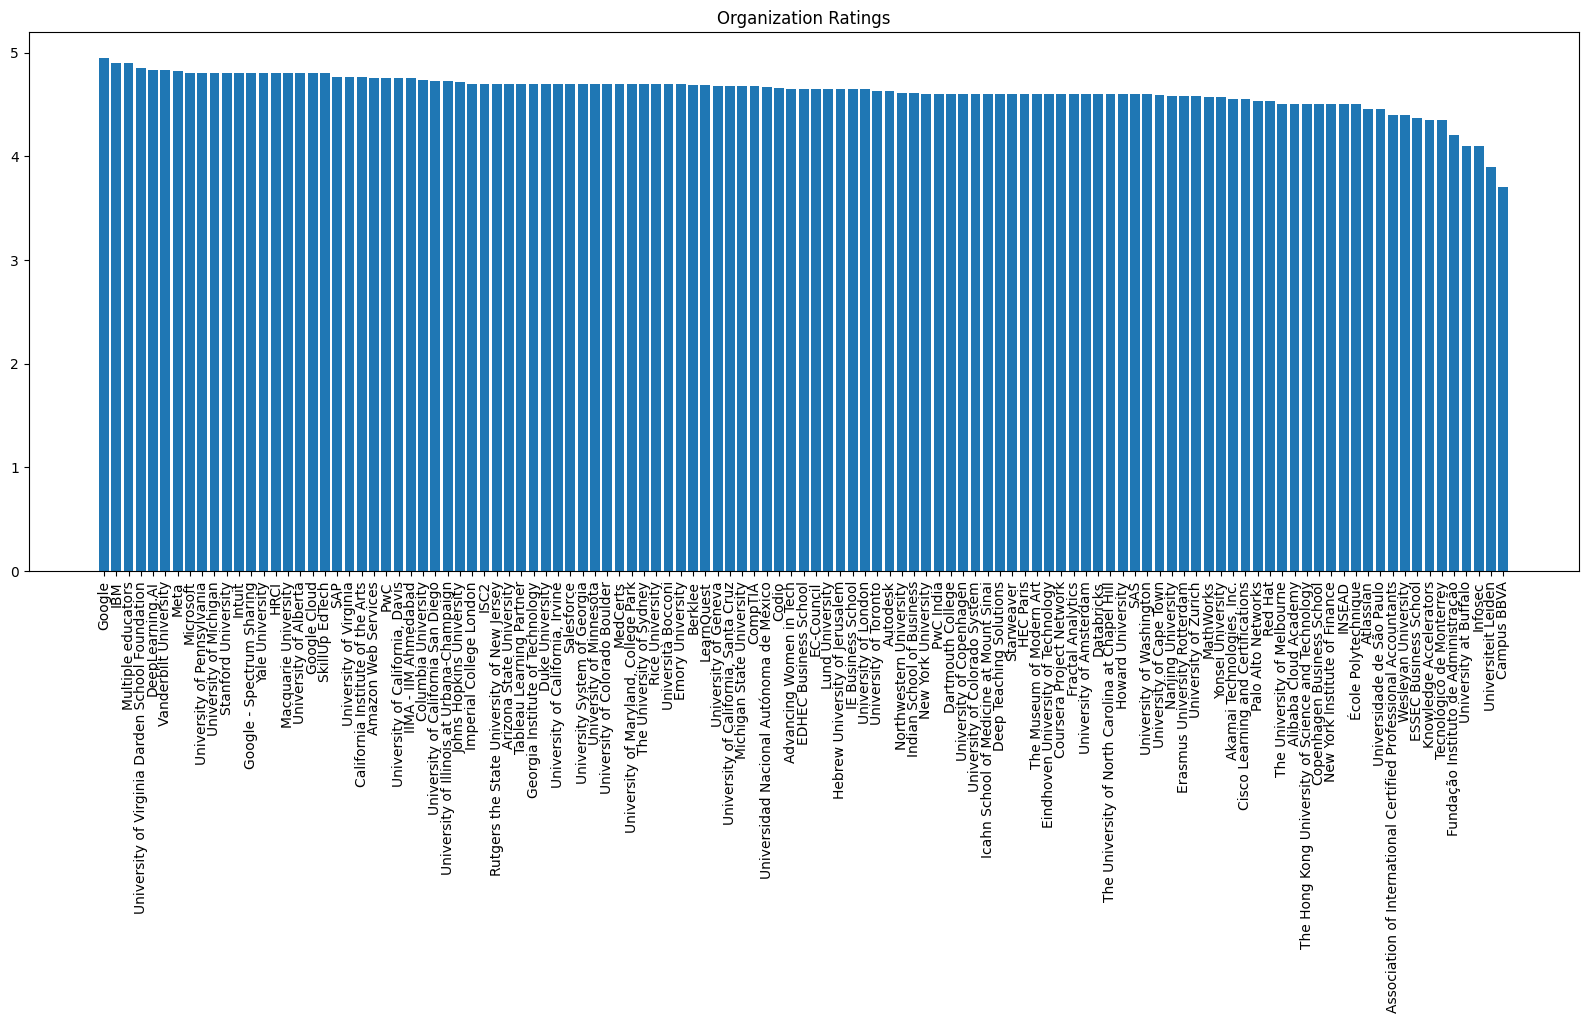

In [10]:
# Data Analysis
print(df.head())
print(df.describe())
print(df.info())

organization = df['Organization'].unique()
organization_ratings = df.groupby('Organization')['Ratings'].mean()

plt.figure(figsize=(20, 7))
plt.title('Organization Ratings')
plt.bar(organization, organization_ratings.sort_values(ascending=False))
plt.xticks(rotation='vertical')
plt.show()

## Course Title Generation

In this section, we demonstrate how to generate course titles using the fine-tuned GPT-2 model.


In [14]:
# Load the fine-tuned model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("./gpt2-finetuned")
model = GPT2LMHeadModel.from_pretrained("./gpt2-finetuned")

# Function to generate course titles
def generate_course_title(skills, model, tokenizer):
    input_text = f"Course skills: {skills}"
    # Encode the input text 
    input_ids = tokenizer.encode(input_text, return_tensors='pt')
    
    # Generate a sequence of tokens from the input
    output = model.generate(input_ids, max_length=200, num_return_sequences=1, no_repeat_ngram_size=2)
    
    # Decode the generated sequence to a readable text
    generated_title = tokenizer.decode(output[0], skip_special_tokens=True)
    
    # Split the generated text based on the delimiter
    titles = generated_title.split('\n')
    titles = titles[0].split('\\n')
    titles = titles[1].split(':')
    title = titles[1][1:]
    
    return title

# Example skills to generate a course title for
skills = ["Linux, Machine Learning, Python Programming",
          "Linux, Cyber Security, C language",
          "AI, Computer Vision, Image Processing",
          "React, Full-Stack, JavaScript, HTML, Node-JS, SQL",
          "Data Analysation, Data Structure, Python, Database Application",
          "Business Analysis, Communication, Leadership and Management, Project Management"]

# Generate the course title
print("______________________________________________________________________")
generated_title = generate_course_title(skills[0], model, tokenizer)
print("Given Course Skills: \\", skills,"\\")
print("Generated Course Title: \\", generated_title,"\\")
print("______________________________________________________________________")
generated_title = generate_course_title(skills[1], model, tokenizer)
print("Given Course Skills: \\", skills,"\\")
print("Generated Course Title: \\", generated_title,"\\")
print("______________________________________________________________________")
generated_title = generate_course_title(skills[2], model, tokenizer)
print("Given Course Skills: \\", skills,"\\")
print("Generated Course Title: \\", generated_title,"\\")
print("______________________________________________________________________")
generated_title = generate_course_title(skills[3], model, tokenizer)
print("Given Course Skills: \\", skills,"\\")
print("Generated Course Title: \\", generated_title,"\\")
print("______________________________________________________________________")
generated_title = generate_course_title(skills[4], model, tokenizer)
print("Given Course Skills: \\", skills,"\\")
print("Generated Course Title: \\", generated_title,"\\")
print("______________________________________________________________________")
generated_title = generate_course_title(skills[5], model, tokenizer)
print("Given Course Skills: \\", skills,"\\")
print("Generated Course Title: \\", generated_title,"\\")
print("______________________________________________________________________")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


______________________________________________________________________


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Given Course Skills: \ ['Linux, Machine Learning, Python Programming', 'Linux, Cyber Security, C language', 'AI, Computer Vision, Image Processing', 'React, Full-Stack, JavaScript, HTML, Node-JS, SQL', 'Data Analysation, Data Structure, Python, Database Application', 'Business Analysis, Communication, Leadership and Management, Project Management'] \
Generated Course Title: \ Applied MachineLearning in Python \
______________________________________________________________________


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Given Course Skills: \ ['Linux, Machine Learning, Python Programming', 'Linux, Cyber Security, C language', 'AI, Computer Vision, Image Processing', 'React, Full-Stack, JavaScript, HTML, Node-JS, SQL', 'Data Analysation, Data Structure, Python, Database Application', 'Business Analysis, Communication, Leadership and Management, Project Management'] \
Generated Course Title: \ IT Fundamentals for Cybersecurity \
______________________________________________________________________


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Given Course Skills: \ ['Linux, Machine Learning, Python Programming', 'Linux, Cyber Security, C language', 'AI, Computer Vision, Image Processing', 'React, Full-Stack, JavaScript, HTML, Node-JS, SQL', 'Data Analysation, Data Structure, Python, Database Application', 'Business Analysis, Communication, Leadership and Management, Project Management'] \
Generated Course Title: \ Generative AI Fundamentals \
______________________________________________________________________


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Given Course Skills: \ ['Linux, Machine Learning, Python Programming', 'Linux, Cyber Security, C language', 'AI, Computer Vision, Image Processing', 'React, Full-Stack, JavaScript, HTML, Node-JS, SQL', 'Data Analysation, Data Structure, Python, Database Application', 'Business Analysis, Communication, Leadership and Management, Project Management'] \
Generated Course Title: \ Introduction to Full Stack JavaScript \
______________________________________________________________________


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Given Course Skills: \ ['Linux, Machine Learning, Python Programming', 'Linux, Cyber Security, C language', 'AI, Computer Vision, Image Processing', 'React, Full-Stack, JavaScript, HTML, Node-JS, SQL', 'Data Analysation, Data Structure, Python, Database Application', 'Business Analysis, Communication, Leadership and Management, Project Management'] \
Generated Course Title: \ SQL for Data Science Capstone Project \
______________________________________________________________________
Given Course Skills: \ ['Linux, Machine Learning, Python Programming', 'Linux, Cyber Security, C language', 'AI, Computer Vision, Image Processing', 'React, Full-Stack, JavaScript, HTML, Node-JS, SQL', 'Data Analysation, Data Structure, Python, Database Application', 'Business Analysis, Communication, Leadership and Management, Project Management'] \
Generated Course Title: \ Modern Project Planning \
______________________________________________________________________
